In [65]:
import sympy
from sympy import sin,cos
from math import pi
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as so

In [66]:
q1,q2,q3,q4,q5 = sympy.symbols('\\theta_1,\\theta_2,\\theta_3,\\theta_4,\\theta_5')

In [67]:
l1,l2,l3,l4 = sympy.symbols('l_1,l_2,l_3,l_4')

In [68]:
def Rz(theta):
    return sympy.Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

In [92]:
Ra = Rz(q1)
Rb = Rz(q2)
Rc = Rz(q3)
Rd = Rz(q4)
Re = Rz(q5)



In [94]:
x = sympy.Matrix([1,0,0])

In [96]:
v1_in_a = l1*x
v1_in_n = Ra*v1_in_a

In [98]:
v2_in_b = l2*x
v2_in_a = Rb*v2_in_b
v2_in_n = Ra*v2_in_a

In [100]:
v3_in_cp = l3*x
v3_in_b = Rc*v3_in_cp
v3_in_a = Rb*v3_in_b
v3_in_n = Ra*v3_in_a

In [102]:
v4_in_d = l4*x
v4_in_a = Rd*v4_in_d
v4_in_n = Ra*v4_in_a

In [104]:
v5_in_e = l3*x
v5_in_d = Re*v5_in_e
v5_in_a = Rd*v5_in_d
v5_in_n = Ra*v5_in_a

In [106]:
p_end = v4_in_n+v5_in_n
p_end_p = v1_in_n+v2_in_n

In [108]:
zero_vec = p_end-p_end_p
zero_vec.simplify()

In [110]:
zero = []
zero.append((zero_vec.T*sympy.Matrix([1,0,0]))[0])
zero.append((zero_vec.T*sympy.Matrix([0,1,0]))[0])
zero.append((v3_in_n.T*v5_in_n)[0]+l3**2)
zero.append(q1)

In [112]:
design = {}
design[l1] = 3
design[l2] = 3.26
design[l3] = 2
design[l4] = 1.25

design1 = {}
design1[l1] = 3
design1[l2] = -3.26
design1[l3] = -2
design1[l4] = -1.25

In [114]:
def plot_fourbar(design,thetas):
    state_variables = q1,q2,q3,q4,q5
    state = dict(zip(state_variables,thetas))
    points_design = points.subs(design)
    points_state = points_design.subs(state)
    points_state_numpy = numpy.array(points_state,dtype=numpy.float64)
    print(points_state_numpy)
    plt.plot(*(points_state_numpy[:2,:]))
    plt.axis('equal')

In [116]:
def gen_objective(design,q4_desired):
    zero_local = zero.copy()
    zero_local.append(q4-q4_desired)
    
    zero_local = sympy.Matrix(zero_local)
    zero_design = zero_local.subs(design)
    
    
    def objective_function(qn):
        q1n,q2n,q3n,q4n,q5n=qn
       
        subs = {}
        subs[q1]=q1n
        subs[q2]=q2n
        subs[q3]=q3n
        subs[q4]=q4n
        subs[q5]=q5n
        
        
        zero_n = zero_design.subs(subs)
        sos = ((zero_n.T*zero_n)[0])**.5

        
        return float(sos)
    return objective_function

In [118]:
guess = numpy.array([0, 30, 30, 90,-30])*pi/180

In [120]:
origin = sympy.Matrix([0,0,0])
p1 = v1_in_n
p2 = v1_in_n + v2_in_n
p3 = v1_in_n + v2_in_n + v3_in_n
p4 = v4_in_n
p5 = v4_in_n + v5_in_n





In [122]:
points = sympy.Matrix([p3.T,p2.T,p1.T,origin.T,p4.T,p5.T]).T

In [124]:
points_design = points.subs(design)

[[4.20227285e-01 1.47229292e+00 3.00000000e+00 0.00000000e+00
  4.27589291e-01 1.47238645e+00]
 [1.17909804e+00 2.88002658e+00 1.46183756e-04 0.00000000e+00
  1.17459244e+00 2.87999530e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[ 4.26294176e-01  1.47243118e+00  3.00000000e+00  0.00000000e+00
   4.27525676e-01  1.47243056e+00]
 [-1.17536843e+00 -2.87994972e+00  4.01455712e-06  0.00000000e+00
  -1.17461560e+00 -2.87995245e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


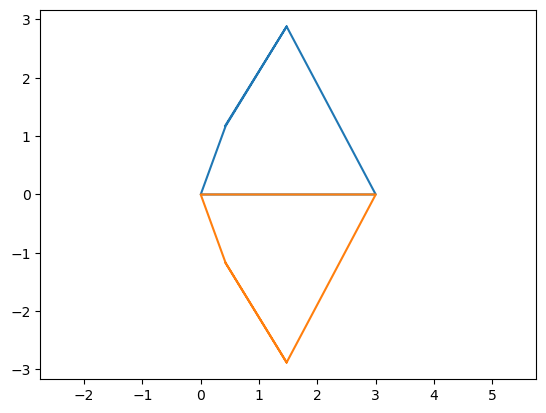

In [126]:
objective_function = gen_objective(design,70*pi/180)
result = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design,result.x)

objective_function = gen_objective(design1,110*pi/180)
result1 = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design1,result1.x)

[[2.16996483e-01 1.40251183e+00 3.00000000e+00 0.00000000e+00
  2.17031077e-01 1.40248089e+00]
 [1.23104302e+00 2.84180475e+00 3.91810489e-05 0.00000000e+00
  1.23101483e+00 2.84182479e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[ 2.24258676e-01  1.40248258e+00  3.00000000e+00  0.00000000e+00
   2.17135626e-01  1.40257701e+00]
 [-1.22568586e+00 -2.84178871e+00 -3.95871203e-05  0.00000000e+00
  -1.23099639e+00 -2.84181256e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


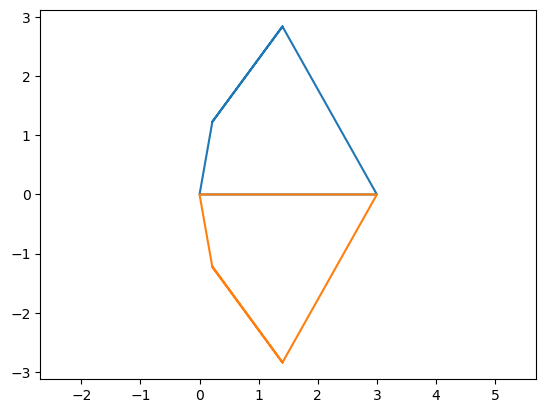

In [128]:
objective_function = gen_objective(design,80*pi/180)
result = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design,result.x)

objective_function = gen_objective(design1,100*pi/180)
result1 = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design1,result1.x)

In [129]:
zero1 = sympy.Matrix(zero)
zero1.simplify()
zero1

Matrix([
[-l_1*cos(\theta_1) - l_2*cos(\theta_1 + \theta_2) + l_3*cos(\theta_1 + \theta_4 + \theta_5) + l_4*cos(\theta_1 + \theta_4)],
[-l_1*sin(\theta_1) - l_2*sin(\theta_1 + \theta_2) + l_3*sin(\theta_1 + \theta_4 + \theta_5) + l_4*sin(\theta_1 + \theta_4)],
[                                                               l_3**2*(cos(\theta_2 + \theta_3 - \theta_4 - \theta_5) + 1)],
[                                                                                                                  \theta_1]])

In [130]:
independent = sympy.Matrix([q4])
dependent = sympy.Matrix([q1,q2,q3,q5])
zero_design = zero1.subs(design)

In [131]:
A = zero_design.jacobian(independent)
A

Matrix([
[-1.25*sin(\theta_1 + \theta_4) - 2*sin(\theta_1 + \theta_4 + \theta_5)],
[ 1.25*cos(\theta_1 + \theta_4) + 2*cos(\theta_1 + \theta_4 + \theta_5)],
[                      4*sin(\theta_2 + \theta_3 - \theta_4 - \theta_5)],
[                                                                     0]])

In [133]:
B = zero_design.jacobian(dependent)

In [138]:
state_variables = q1,q2,q3,q4,q5
state = dict(zip(state_variables,result.x))
An = numpy.array(A.subs(state),dtype=float)
An

array([[-2.84182479e+00],
       [ 1.40248089e+00],
       [ 1.62741516e-04],
       [ 0.00000000e+00]])

In [140]:
state1 = dict(zip(state_variables,result1.x))
An1 = numpy.array(A.subs(state1),dtype=float)
An1

array([[-2.84181256],
       [-1.40257701],
       [ 0.01789309],
       [ 0.        ]])

In [142]:
Bn = numpy.array(B.subs(state),dtype=float)
Bn

array([[-2.00435131e-05,  2.84176557e+00,  0.00000000e+00,
        -1.61080996e+00],
       [-3.09410951e-05,  1.59748817e+00,  0.00000000e+00,
         1.18544981e+00],
       [ 0.00000000e+00, -1.62741516e-04, -1.62741516e-04,
         1.62741516e-04],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [144]:
Bn1 = numpy.array(B.subs(state1),dtype=float)
Bn1

array([[-1.03016349e-04,  2.84174913e+00,  0.00000000e+00,
        -1.61081616e+00],
       [-6.00009443e+00, -1.59751742e+00,  0.00000000e+00,
        -1.18544139e+00],
       [ 0.00000000e+00, -1.78930924e-02, -1.78930924e-02,
         1.78930924e-02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [146]:
Cn = -numpy.linalg.inv(Bn)@An
Cn

array([[ 0.        ],
       [ 0.18675643],
       [-0.6215047 ],
       [-1.43474827]])

In [148]:
Cn1 = -numpy.linalg.inv(Bn1)@An1
Cn1

array([[-2.56133256e-17],
       [ 1.86722007e-01],
       [-6.21519787e-01],
       [-1.43479778e+00]])

In [150]:
p_out = v4_in_n + .5*v5_in_n
p_out

Matrix([
[-l_4*sin(\theta_1)*sin(\theta_4) + l_4*cos(\theta_1)*cos(\theta_4) + 0.5*(-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) - 0.5*(l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*sin(\theta_1)],
[ l_4*sin(\theta_1)*cos(\theta_4) + l_4*sin(\theta_4)*cos(\theta_1) + 0.5*(-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) + 0.5*(l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*cos(\theta_1)],
[                                                                                                                                                                                                                                                  0]])

In [152]:
D = p_out.jacobian(independent)
Dn = numpy.array(D.subs(design).subs(state),dtype=float)
E = p_out.jacobian(dependent)
En = numpy.array(E.subs(design).subs(state),dtype=float)
Jo = Dn+(En@Cn)
Jo

array([[-0.88086641],
       [-0.04065505],
       [ 0.        ]])

In [154]:
D1 = p_out.jacobian(independent)
Dn1 = numpy.array(D.subs(design1).subs(state1),dtype=float)
E1 = p_out.jacobian(dependent)
En1 = numpy.array(E.subs(design1).subs(state1),dtype=float)
Jo1 = Dn1+(En1@Cn1)
Jo1

array([[ 0.88080675],
       [-0.04057802],
       [ 0.        ]])

In [156]:
y_dot = Jo@numpy.array([[1,]]).T
y_dot

array([[-0.88086641],
       [-0.04065505],
       [ 0.        ]])

In [158]:
y_dot1 = Jo1@numpy.array([[1,]]).T
y_dot1

array([[ 0.88080675],
       [-0.04057802],
       [ 0.        ]])

In [160]:
p_out_n = numpy.array(p_out.subs(design).subs(state),dtype=float)
p_out_n

array([[0.80975598],
       [2.03641981],
       [0.        ]])

In [162]:
p_out_n1 = numpy.array(p_out.subs(design1).subs(state1),dtype=float)
p_out_n1

array([[ 0.80985632],
       [-2.03640448],
       [ 0.        ]])

[[2.16996483e-01 1.40251183e+00 3.00000000e+00 0.00000000e+00
  2.17031077e-01 1.40248089e+00]
 [1.23104302e+00 2.84180475e+00 3.91810489e-05 0.00000000e+00
  1.23101483e+00 2.84182479e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[ 2.24258676e-01  1.40248258e+00  3.00000000e+00  0.00000000e+00
   2.17135626e-01  1.40257701e+00]
 [-1.22568586e+00 -2.84178871e+00 -3.95871203e-05  0.00000000e+00
  -1.23099639e+00 -2.84181256e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


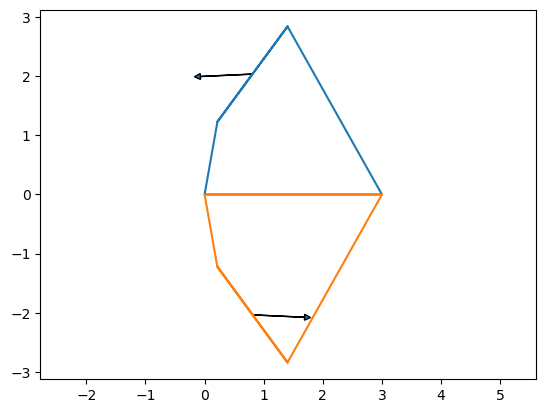

In [164]:
plot_fourbar(design,result.x)
plt.arrow(p_out_n[0,0],p_out_n[1,0],y_dot[0,0],y_dot[1,0],
            shape='full',head_width=.1,head_length=.1)

plot_fourbar(design1,result1.x)
plt.arrow(p_out_n1[0,0],p_out_n1[1,0],y_dot1[0,0],y_dot1[1,0],
            shape='full',head_width=.1,head_length=.1)